## Non-Linear Classification

    In Many Real Life Problems, the Data is not Linearly Separable, we Need to Classify the Data. This can be done using by Projecting the Data to Higher Dimensions so that it Becomes Linearly Separable. 

### Projecting Data to Higher Dimensions !

    When Working With Non-Linear Datasets, We Can Project Original Feature Vectors Into Higher Dimensional Space Where They Can Be Linearly Separated !

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles

In [2]:
X, Y = make_circles(n_samples=500, noise=0.02)

In [3]:
print(X.shape, Y.shape)

(500, 2) (500,)


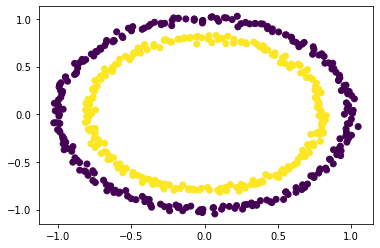

In [4]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

##### x -> phi(x)
##### Non-Linear Transformation : phi(x)
##### where x -> [x1 x2] and phi(x) -> [x1 x2 x3]
##### and x3 = (x1^2) + (x2^2)

In [5]:
def phi(X):
    """ Non Linear Transformation """
    
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = ((X1**2) + (X2**2))
    
    X_ = np.zeros((X.shape[0],3))
    
    X_[:,:-1] = X
    X_[:,-1] = X3
    
    return X_

In [6]:
X_ = phi(X)

print(X[:2,:])
print(X_[:2,:])

[[-0.46842727 -0.89681077]
 [ 0.02036949 -0.7690522 ]]
[[-0.46842727 -0.89681077  1.02369366]
 [ 0.02036949 -0.7690522   0.5918562 ]]


In [7]:
def plot3d(X, show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    ax.scatter(X1, X2, X3, zdir='z', s=20, c=Y, depthshade=True)
    if(show==True):
        plt.show()
    return ax

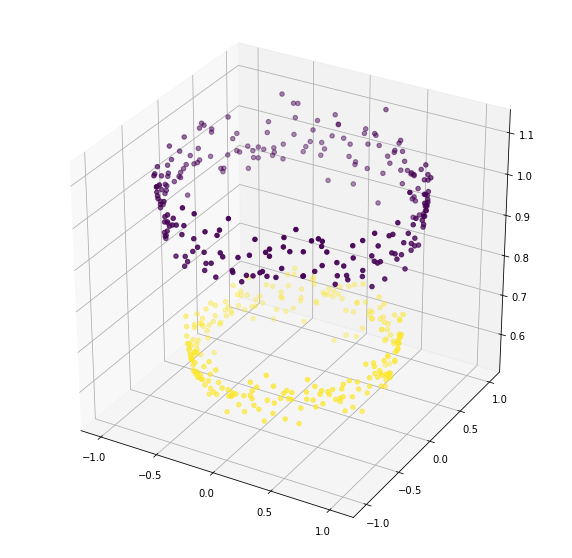

In [8]:
ax = plot3d(X_)

## Logistic Classifier

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [10]:
lr = LogisticRegression()

In [11]:
acc = cross_val_score(lr, X, Y, cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 46.8000


## Logistic Classifier on Higher Dimension Space

In [12]:
acc = cross_val_score(lr, X_, Y, cv=5).mean()
print("Accuracy X(3D) is %.4f"%(acc*100))

Accuracy X(3D) is 100.0000


### Visualise The Decision Surface

In [13]:
lr.fit(X_, Y)
wts = lr.coef_
bias = lr.intercept_
print(wts, bias)

[[-5.42460490e-05  1.20823609e-02 -1.08538692e+01]] [8.88912883]


In [14]:
# This Gives us A Plane -> (ax + by + cz + d = 0)
# => z = -(ax + by + d)/c
# where a=w[0], b=w[1], c=w[2]

xx, yy = np.meshgrid(range(-2,2), range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [15]:
z = -((wts[0,0] * xx) + (wts[0,1] * yy) + bias)/(wts[0,2])
print(z)

[[0.81676611 0.81676112 0.81675612 0.81675112]
 [0.8178793  0.8178743  0.8178693  0.8178643 ]
 [0.81899248 0.81898749 0.81898249 0.81897749]
 [0.82010567 0.82010067 0.82009567 0.82009067]]


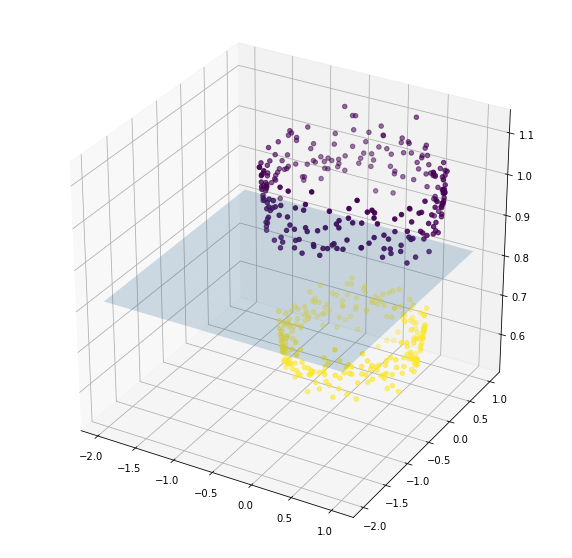

In [16]:
axes = plot3d(X_, show=False)
axes.plot_surface(xx, yy, z, alpha=0.2)
plt.show()